<a href="https://colab.research.google.com/github/guptankit005/Analytics/blob/master/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
#loading dataset (https://www.kaggle.com/harrywang/wine-dataset-for-clustering?select=wine-clustering.csv)
wine_data = pd.read_csv('wine-clustering.csv')

In [6]:
#seeing first five rows of data
wine_data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [7]:
#checking basic statisticsl information about dataset
wine_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic_Acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Ash_Alcanity,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total_Phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid_Phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
Color_Intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


In [8]:
#check for null and duplicate values
print('No. of null rows with null value : ', wine_data.isnull().sum())
print('No. of null rows with duplicate value : ', wine_data.duplicated().sum())

No. of null rows with null value :  Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64
No. of null rows with duplicate value :  0


In [9]:
# Normalization function 
def norm(i):
    x = (i-i.min())	/ (i.max()-i.min())
    return (x)

In [10]:
#normalizing the data
norm_data = norm(wine_data)
norm_data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963


# Hierarchial Clustering (Agglomerative )

In [11]:
#importing libraries for creating dendogram
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch

#defining linkage
z = linkage(norm_data, method ='complete', metric = 'euclidean')

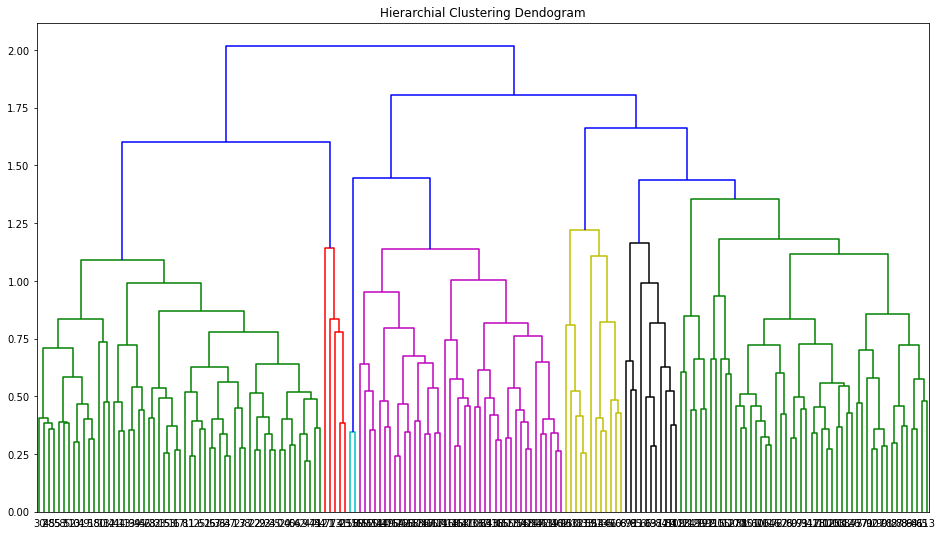

In [12]:
#plotting dendogram
plt.figure(figsize = (16,9))
plt.title('Hierarchial Clustering Dendogram')
sch.dendrogram(z, leaf_rotation=0, leaf_font_size=10)
plt.show()

In [13]:
#with the help of dendogram we will select 5 clusters for our analysis
from sklearn.cluster import AgglomerativeClustering

h_complete = AgglomerativeClustering(n_clusters = 5, linkage='complete', affinity = 'euclidean').fit(norm_data)


In [14]:
#adding labels to our dataset
Wine_heirarch = wine_data
Wine_heirarch['Cluster'] = pd.Series(h_complete.labels_)

In [15]:
Wine_heirarch.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Cluster
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,4
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,4
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,4
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,4
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2


In [25]:
# Aggregate mean of each cluster
Wine_heirarch.groupby(Wine_heirarch.Cluster).agg(['mean', 'std']).transpose()

Cluster                              0           1           2
Alcohol              mean    13.711475   13.099818   12.213226
                     std      0.491826    0.529687    0.530774
Malic_Acid           mean     1.997049    3.160909    1.938710
                     std      0.681215    1.179373    1.022096
Ash                  mean     2.453770    2.407455    2.244355
                     std      0.226533    0.195554    0.331314
Ash_Alcanity         mean    17.281967   21.043636   20.298387
                     std      3.011894    2.487879    3.200486
Magnesium            mean   107.786885   98.654545   92.790323
                     std     13.184732   11.082549   14.045753
Total_Phenols        mean     2.842131    1.689818    2.293871
                     std      0.341341    0.369902    0.520804
Flavanoids           mean     2.969180    0.847818    2.152581
                     std      0.401444    0.332118    0.693858
Nonflavanoid_Phenols mean     0.289180    0.457818    0.348226
                     std      0.069745    0.123178    0.113809
Proanthocyanins      mean     1.922951    1.133636    1.669839
                     std      0.442083    0.426950    0.540226
Color_Intensity      mean     5.444590    6.936545    3.011452
                     std      1.302997    2.499873    0.896783
Hue                  mean     1.067705    0.716836    1.062419
                     std      0.119449    0.150754    0.204664
OD280                mean     3.154754    1.709273    2.877903
                     std      0.360331    0.271169    0.410690
Proline              mean  1110.639344  624.854545  497.274194
                     std    219.605634  123.684398  133.029292

In [17]:
#let us also see the count for each cluster
print(Wine_heirarch.Cluster.value_counts())

1    61
4    57
0    43
3    12
2     5
Name: Cluster, dtype: int64


# Partition Based Clustering / Non-Hierarchial Clustering (K-means)

In [18]:
#importing sklearn Kmean
from sklearn.cluster import	KMeans

In [19]:
#scree plot or elbow curve
TWCSS = []
k = list(range(2, 9))

for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(norm_data)
    TWCSS.append(kmeans.inertia_)

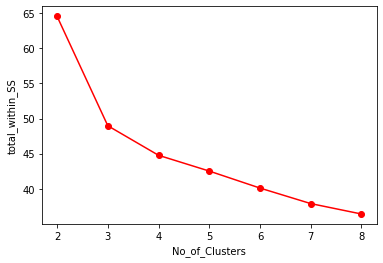

In [26]:
# Scree plot 
plt.plot(k, TWCSS, 'ro-')
plt.xlabel("No_of_Clusters")
plt.ylabel("total_within_SS")
plt.show()

In [21]:
# Selecting 3 clusters from the above scree plot which is the optimum number of clusters 
model = KMeans(n_clusters = 3)
model.fit(norm_data)

KMeans(n_clusters=3)

In [22]:
#adding labels to our dataset
wine_kmean = wine_data
wine_kmean['Cluster'] = pd.Series(model.labels_ )

In [27]:
# Aggregate mean of each cluster
wine_kmean.groupby(wine_kmean.Cluster).agg(['mean']).transpose()

,Cluster,0,1,2
Alcohol,mean,13.711475,13.099818,12.213226
Malic_Acid,mean,1.997049,3.160909,1.938710
Ash,mean,2.453770,2.407455,2.244355
Ash_Alcanity,mean,17.281967,21.043636,20.298387
Magnesium,mean,107.786885,98.654545,92.790323
Total_Phenols,mean,2.842131,1.689818,2.293871
Flavanoids,mean,2.969180,0.847818,2.152581
Nonflavanoid_Phenols,mean,0.289180,0.457818,0.348226
Proanthocyanins,mean,1.922951,1.133636,1.669839
Color_Intensity,mean,5.444590,6.936545,3.011452


In [24]:
#let us also see the count for each cluster
print(wine_kmean.Cluster.value_counts())

2    62
0    61
1    55
Name: Cluster, dtype: int64
